 <div style="background-color: #44b3f2 ;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        FAKE BILL CLASSIFICATION
    </h2>
</div>

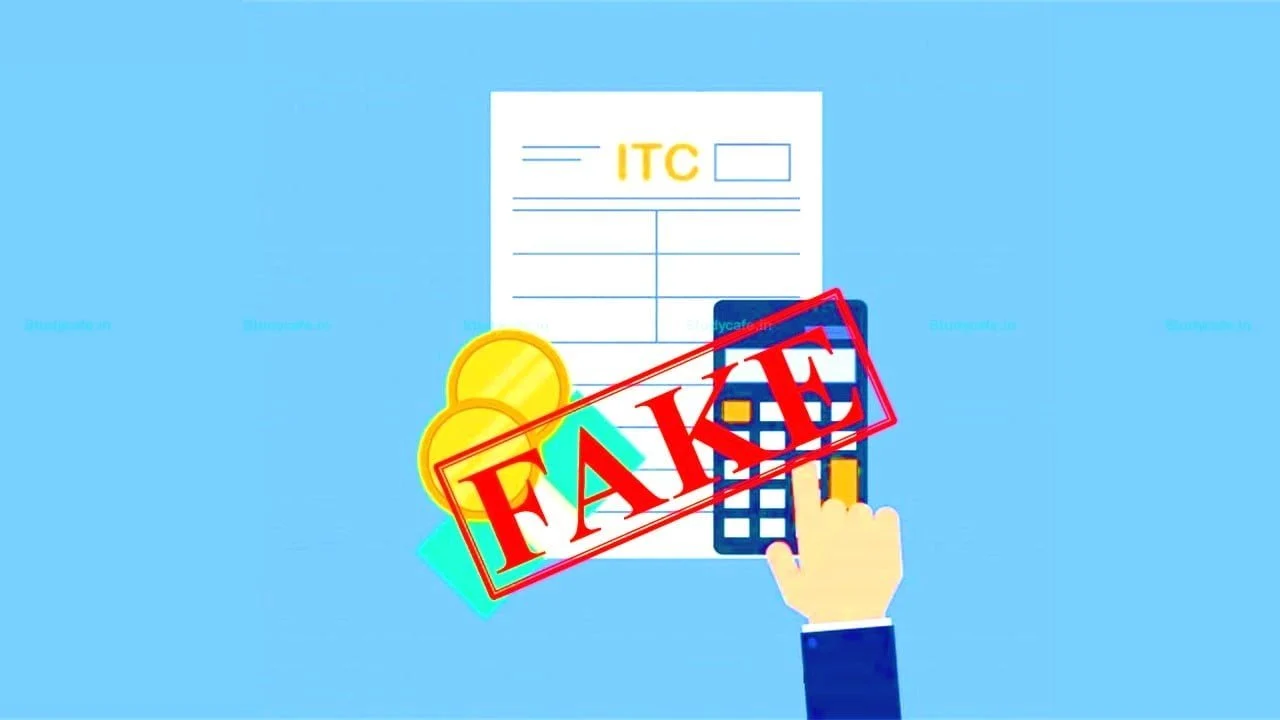

In [34]:
#import necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import algorithms to use

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Standardize features by removing the mean and scaling to unit variance

from sklearn.preprocessing import StandardScaler

#library for splitting data into train and test

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

import sklearn.metrics as metrics

#library for cross validation
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
#read fake_bills.csv dataset

dataset = pd.read_csv("fake_bills.csv",sep=";")

In [6]:
dataset.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [7]:
#last five rows of dataset

dataset.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#### Observation: There seems to be missing values in the 'margin_low' column.

#### Let's deal with the missing data

In [9]:
dataset.margin_low.describe()

count    1463.000000
mean        4.485967
std         0.663813
min         2.980000
25%         4.015000
50%         4.310000
75%         4.870000
max         6.900000
Name: margin_low, dtype: float64

In [10]:
##let's look at the central tendency of this column

mean_dataset = dataset['margin_low'].mean()
med_dataset = dataset['margin_low'].median()
mode_dataset = dataset['margin_low'].mode()
print(mean_dataset)
print(med_dataset)
print(mode_dataset[0])

4.485967190704033
4.31
4.08


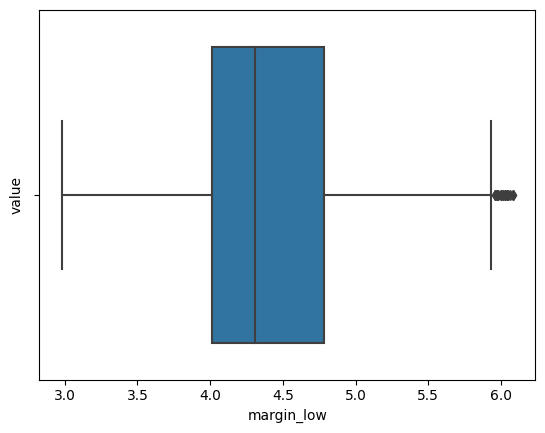

In [40]:
sns.boxplot(x = dataset['margin_low'])
plt.xlabel('margin_low')
plt.ylabel('value')
plt.show()


#### There are a couple of outliers in this column so I will use the median in place of the missing data.

In [11]:
#filling margin_low with median

dataset['margin_low'].fillna(med_dataset, axis = 0, inplace = True)

In [12]:
# checking null values in column margin_low

dataset['margin_low'].isnull().sum()

0

#### We are going to transform the 'is_geniune' column into a binary data where 1 is true and 0 is false.

In [13]:
dataset['is_genuine'] = dataset['is_genuine'].replace({True: 1, False: 0})

In [14]:
dataset['is_genuine'].nunique()

2

### Let us move the 'is_genuine' column to the end of the dataframe.

In [15]:
dataset = dataset[[col for col in dataset if col != 'is_genuine'] + ['is_genuine']]

In [16]:
dataset.sample(5)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
998,171.44,103.96,103.92,3.68,2.89,113.21,1
462,171.48,103.95,103.93,4.52,2.91,113.21,1
148,172.46,103.99,104.04,4.14,2.68,112.93,1
1282,171.80,104.14,104.26,5.67,3.35,111.46,0
3,171.36,103.91,103.94,3.62,3.01,113.51,1


In [17]:
dataset.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
is_genuine      0
dtype: int64

#<div style="background-color: #44b3f2 ;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Exploratory Data Analysis
    </h2>
</div> 

## KDE PLOT

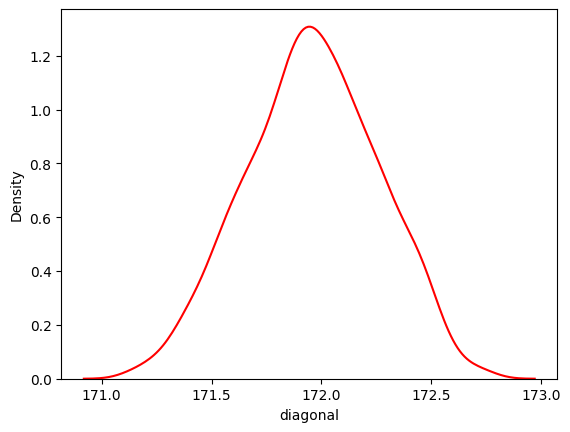

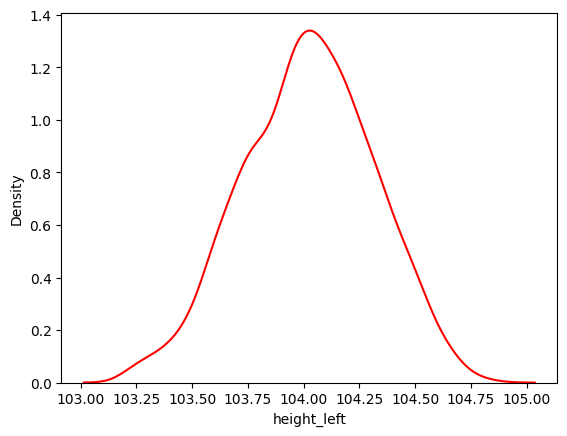

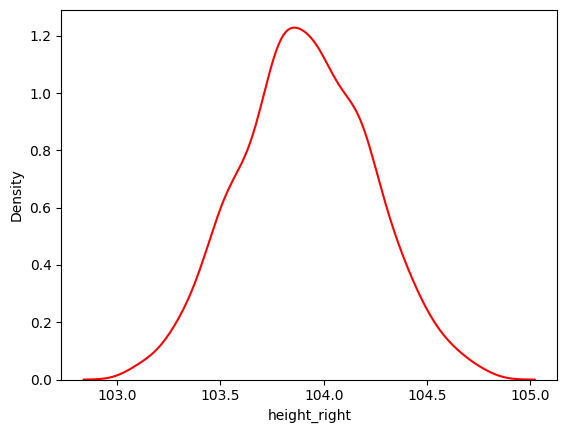

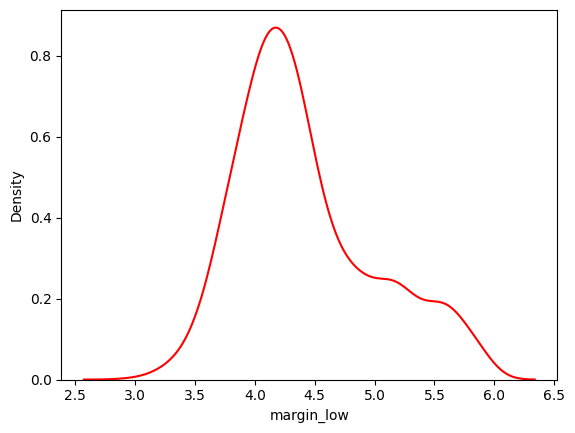

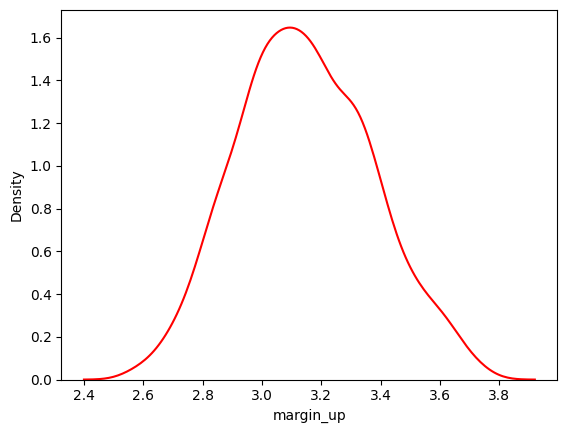

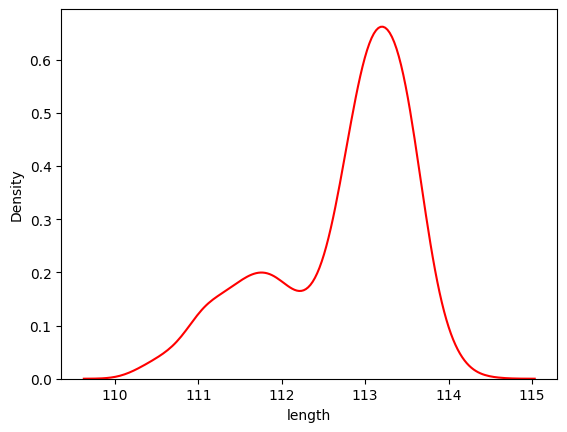

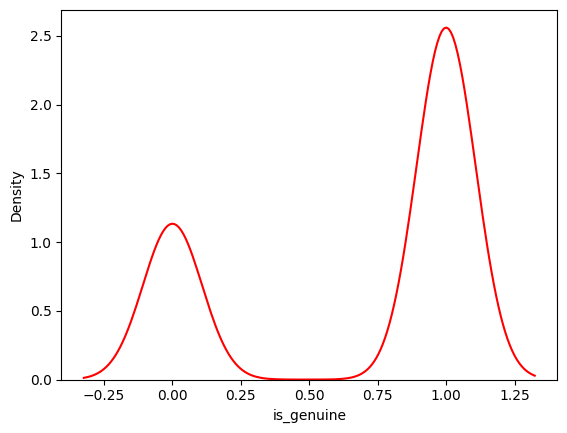

In [57]:
for i in dataset.columns:
    sns.kdeplot(x= dataset[i], color = "red")
    plt.show()

### finding the outliers

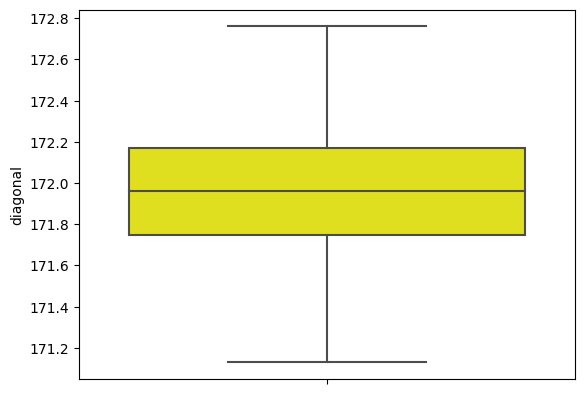

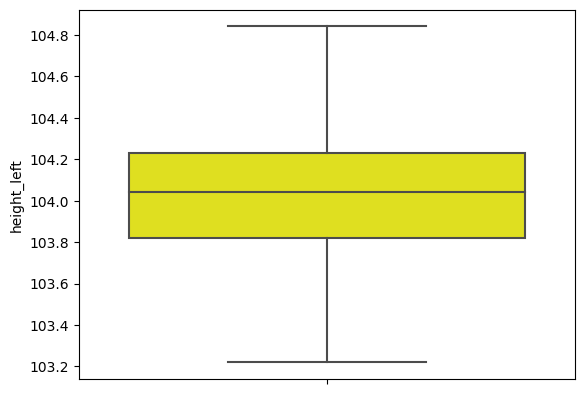

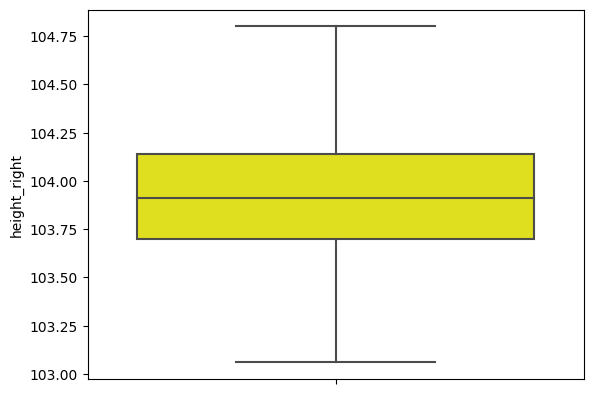

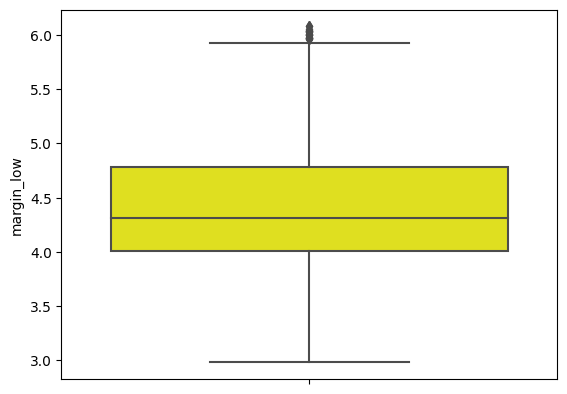

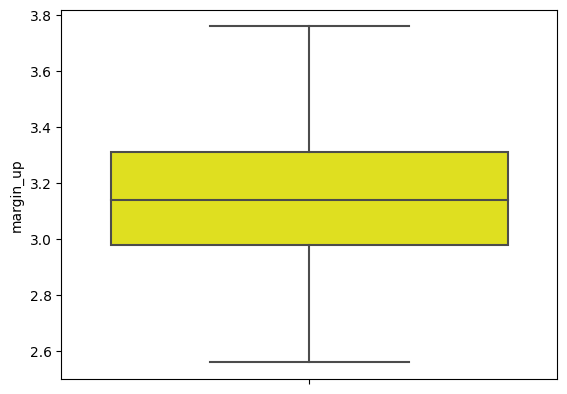

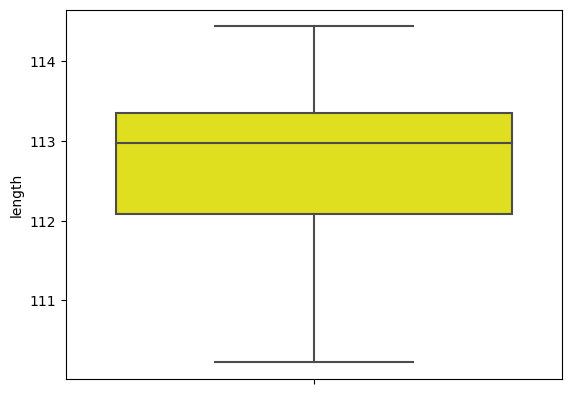

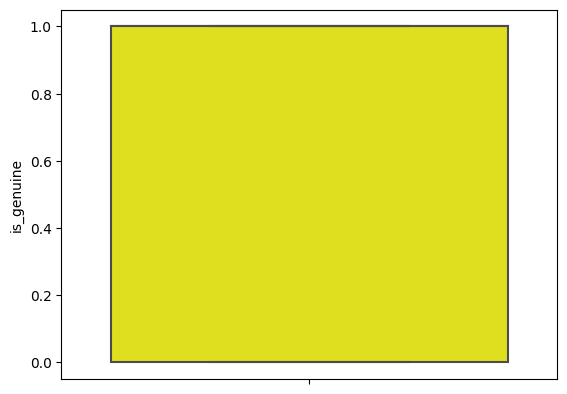

In [44]:
for i in dataset.columns:
    sns.boxplot(y = dataset[i], color = "yellow")
    plt.show()

In [45]:
def outlier_limit(col):
    Q1 , Q3 = np.nanpercentile(col, [25, 75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL, UL

In [46]:
for col in dataset.columns:
        LL, UL = outlier_limit(dataset[col])
        dataset[col] = np.where((dataset[col] > UL) | (dataset[col] < LL), np.nan, dataset[col])

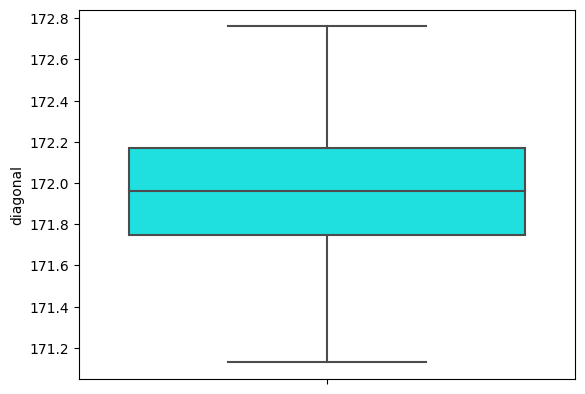

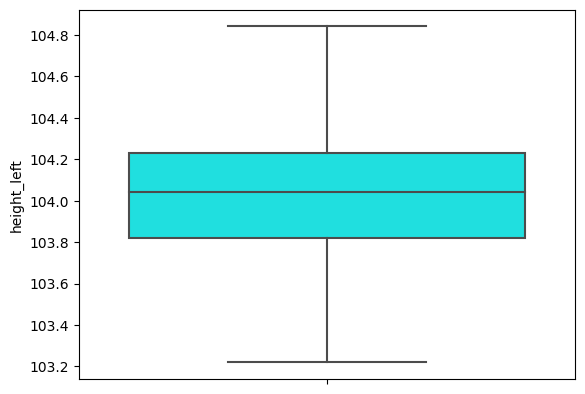

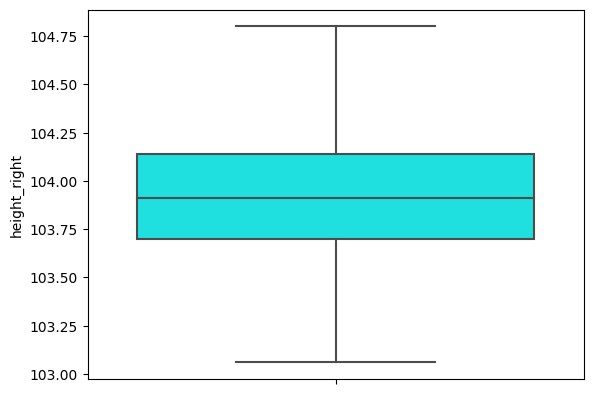

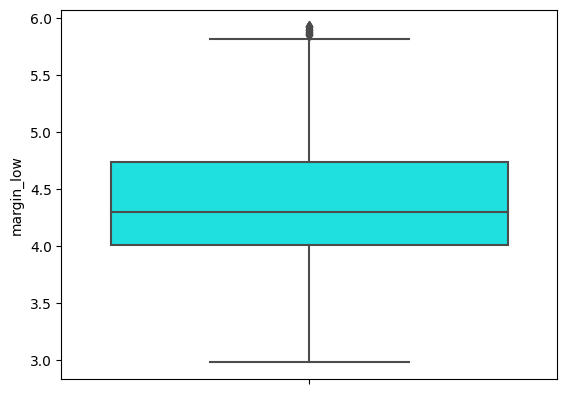

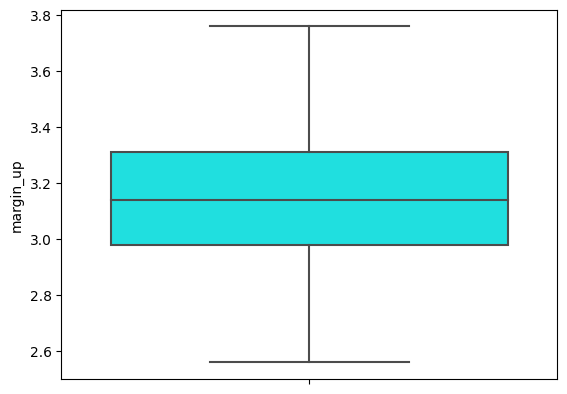

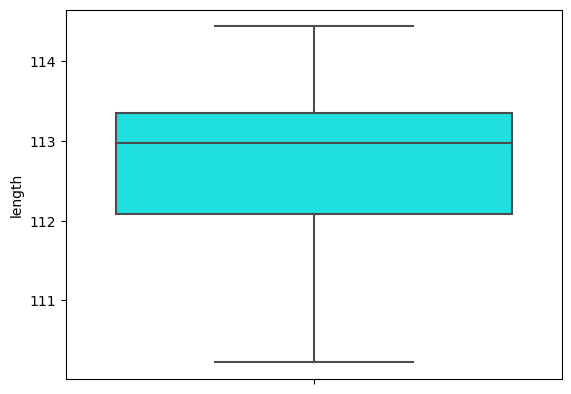

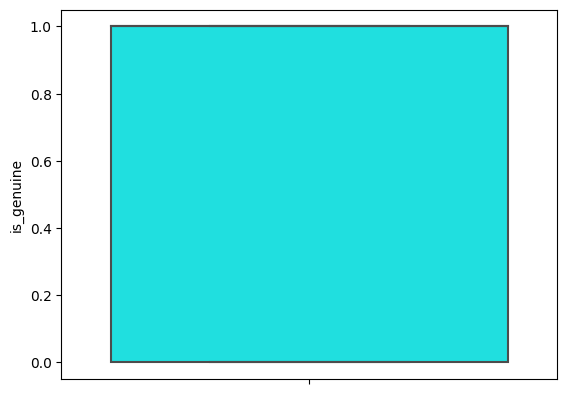

In [47]:
for i in dataset.columns:
        sns.boxplot(y = dataset[i], color = "cyan")
        plt.show();

In [48]:
dataset.isnull().sum()

diagonal         0
height_left      0
height_right     0
margin_low      21
margin_up        0
length           0
is_genuine       0
dtype: int64

In [49]:
dataset.dropna(inplace = True)

In [50]:
dataset.isnull().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
is_genuine      0
dtype: int64

In [51]:
dataset.shape

(1424, 7)

### Let us look at the distribution of the data

## SPEARMAN CORRELATION HEATMAP

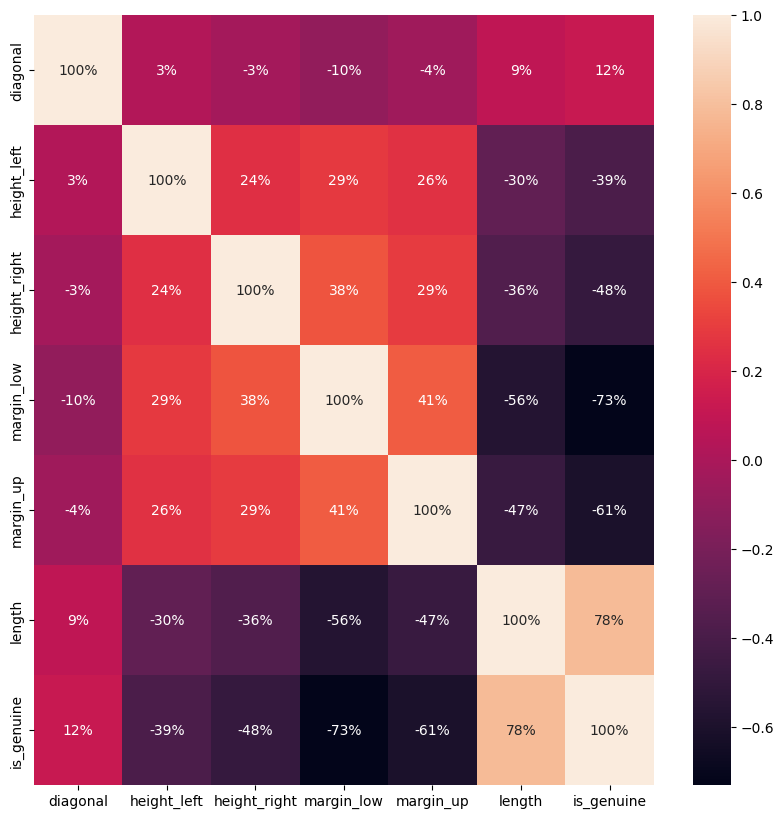

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

<AxesSubplot: >

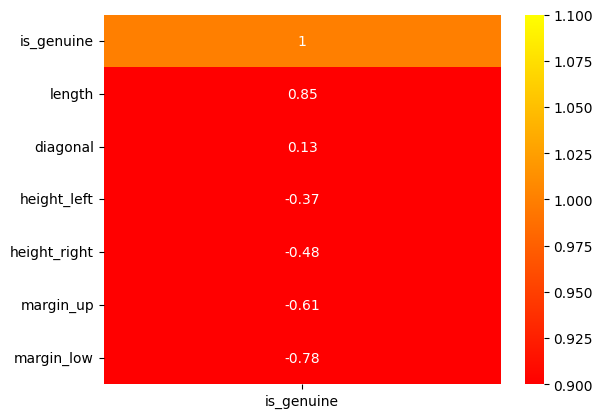

In [42]:
sns.heatmap(dataset.corr()[["is_genuine"]].sort_values(by = "is_genuine", ascending = False), vmin = 1, vmax = 1, annot = True, cmap = "autumn")

### The 'margin_low' and 'length' shows a strong correlation with our dependent variable (is_genuine).

####  Show the distribution of values in each column of the dataframe

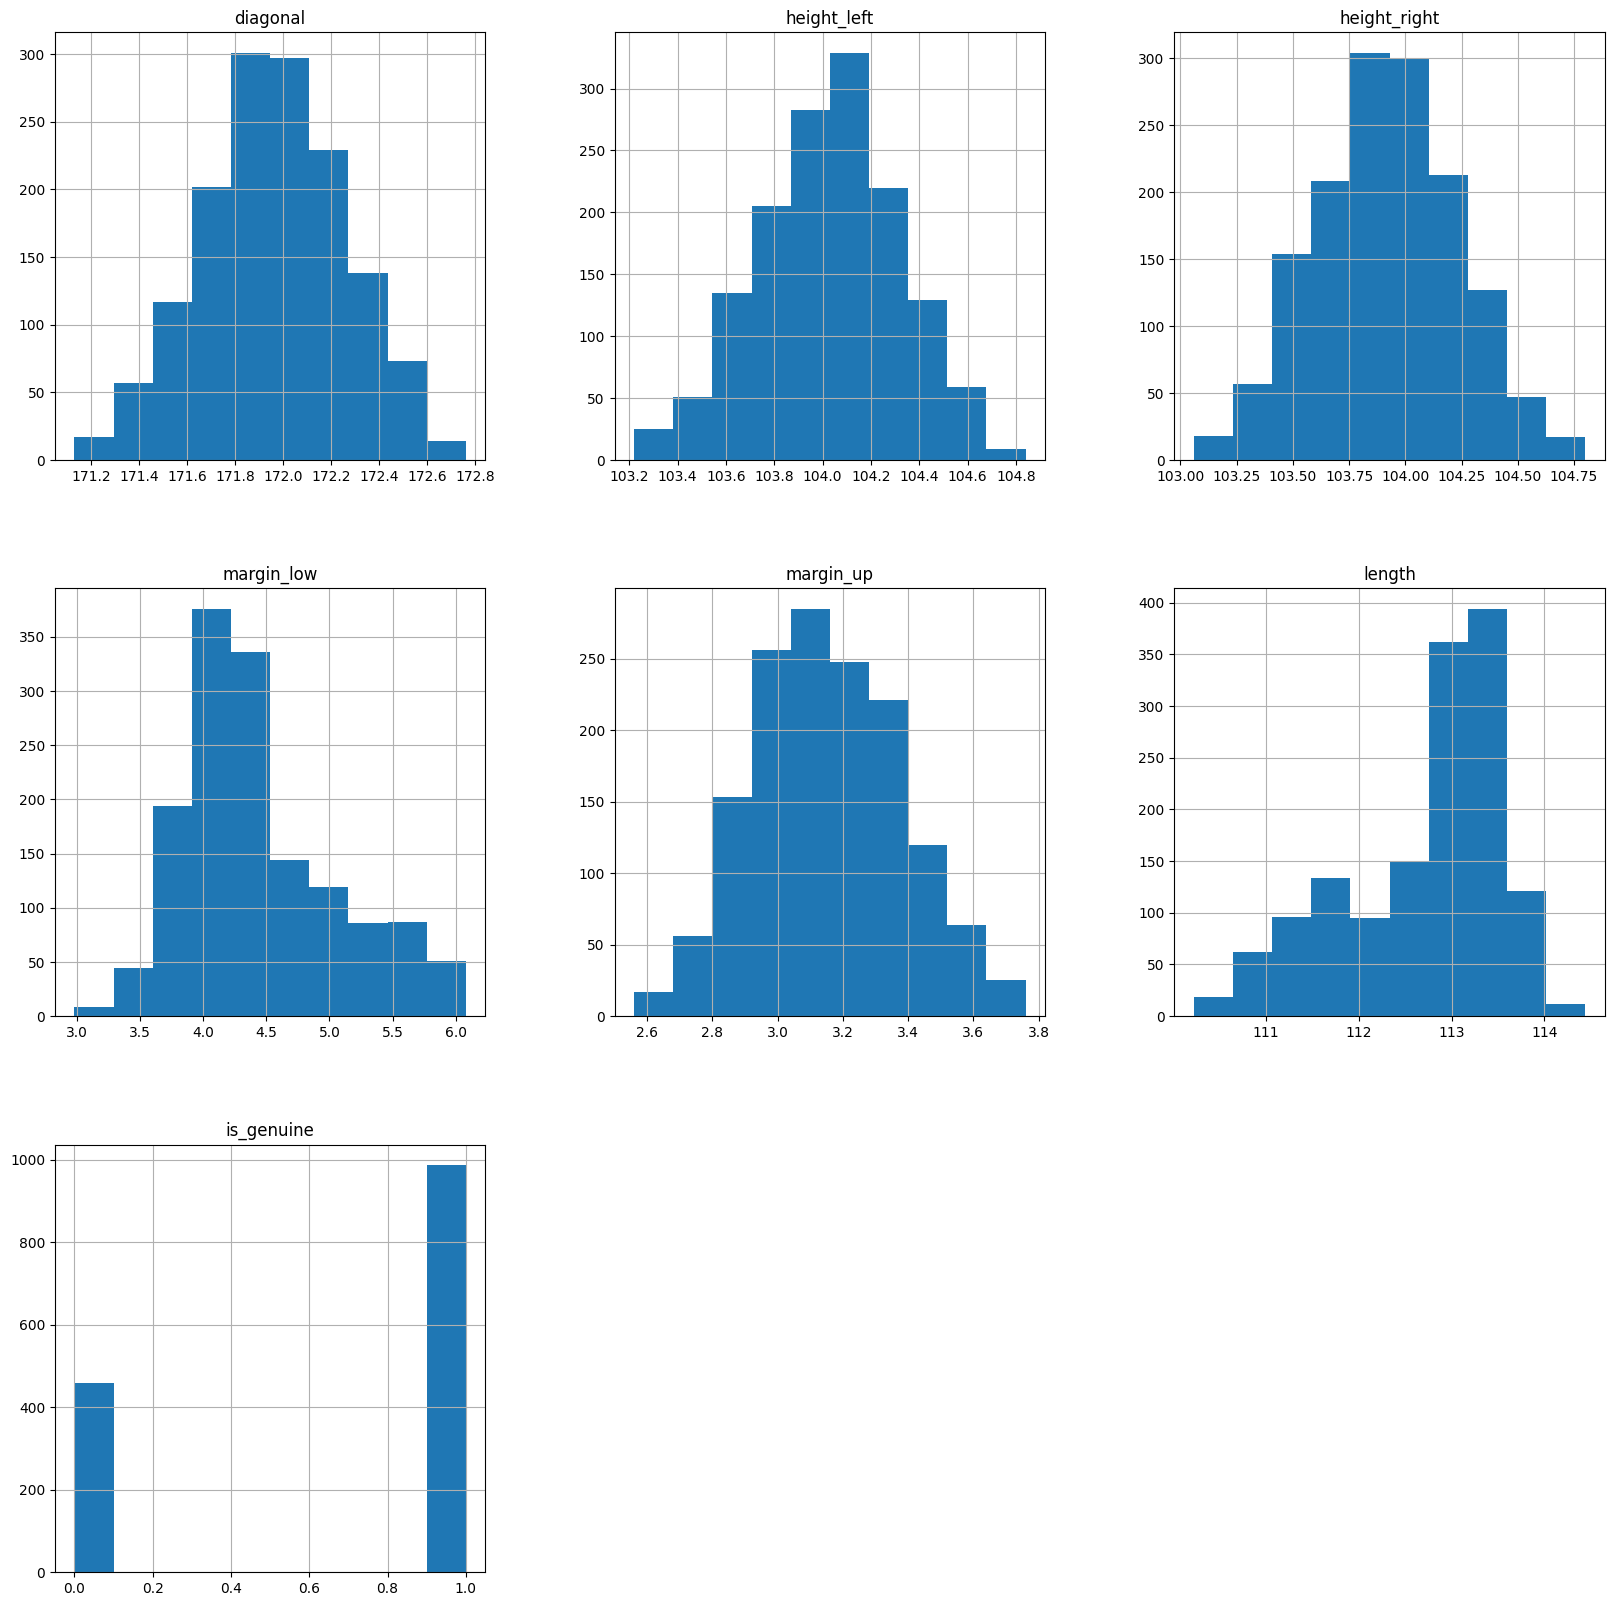

In [43]:
dataset.hist(figsize=(20, 20))
plt.show()

#### 1.The margin_low and the length are slightly skewed.
#### 2.The distribution of our target variable, 'is_genuine' is not even.

### Splitting data into training and test set

In [28]:
x = dataset.drop(['is_genuine'], axis = 1)
y = dataset['is_genuine']

### scaling the data set

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [30]:

x_train, x_test, y_train , y_test= train_test_split(x, y, test_size = 0.3, random_state = 1)

<div style="background-color: #44b3f2 ;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
        Classification Models
    </h2>
</div>

In [31]:
models = {
    "KNN" : KNeighborsClassifier(n_neighbors =5),
    "Logistic Regression" : LogisticRegression(),
    "Random Forest Classification" : RandomForestClassifier(random_state=1),
    "Decision Tree Classification" : DecisionTreeClassifier(random_state =1),
}

Model we choose be: KNN
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       129
         1.0       0.98      0.99      0.99       305

    accuracy                           0.98       434
   macro avg       0.98      0.98      0.98       434
weighted avg       0.98      0.98      0.98       434

Accuracy: 99.11 %


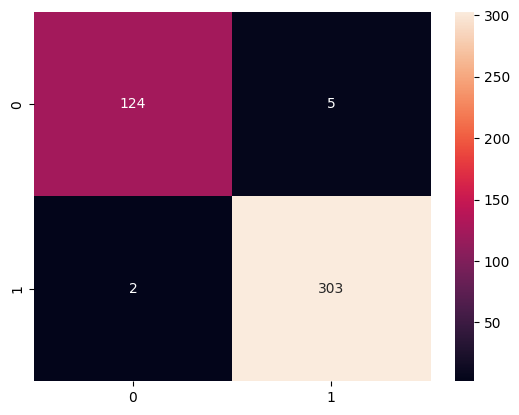

Model we choose be: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       129
         1.0       0.99      0.99      0.99       305

    accuracy                           0.99       434
   macro avg       0.99      0.98      0.98       434
weighted avg       0.99      0.99      0.99       434

Accuracy: 99.21 %


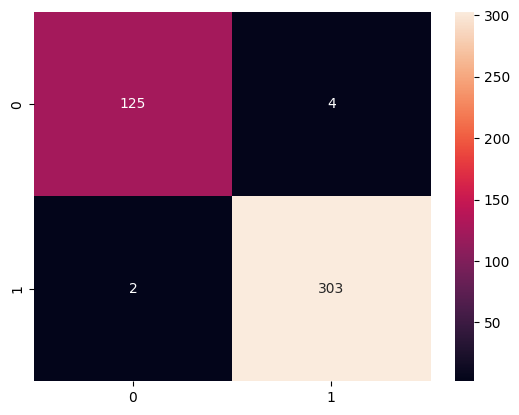

Model we choose be: Random Forest Classification
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       129
         1.0       0.98      0.98      0.98       305

    accuracy                           0.98       434
   macro avg       0.97      0.97      0.97       434
weighted avg       0.98      0.98      0.98       434

Accuracy: 99.31 %


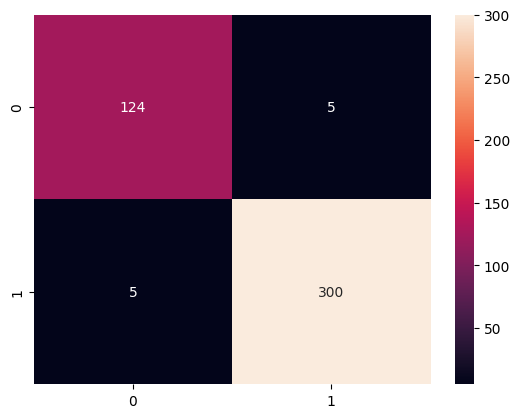

Model we choose be: Decision Tree Classification
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       129
         1.0       0.98      0.98      0.98       305

    accuracy                           0.98       434
   macro avg       0.97      0.97      0.97       434
weighted avg       0.98      0.98      0.98       434

Accuracy: 99.01 %


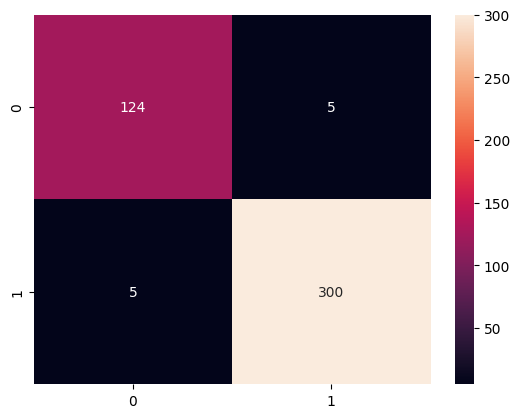

In [32]:
for name, model in models.items():
    print(f"Model we choose be: {name}")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print("Accuracy: {:.2f} %".format(scores.mean() * 100))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
    plt.show()

## All the models are performing well with the Random Forest being the best based on the cross validation scores.

In [33]:
model = RandomForestClassifier(random_state=1)

<div style="background-color: #44b3f2 ;text-align: center;box-shadow: rgba(0, 0, 0, 0.24) 0px 3px 8px;">
    <h2 style='padding-top:10px;padding-bottom: 10px;'>
       ROC CURVE
    </h2>
</div> 

model used is :: RandomForestClassifier(random_state=1)


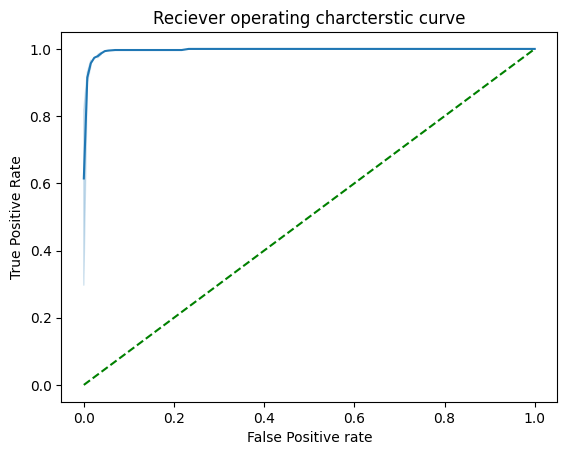

In [35]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,thresold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("model used is ::",model)
sns.lineplot(x=fpr,y=tpr)
plt.plot([0,1],[0,1],color="green",linestyle='--')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title('Reciever operating charcterstic curve')
plt.show()